In [8]:
import matplotlib.pyplot as plt
import numpy as np
import time 
import timeit
import tqdm

## Fibonacci Numbers

$n^{th}$ Fibonacci number is defined as:
$$
\begin{cases}
F_0 = 0, \\
F_1 = 1, \\
F_n = F_{n-1} + F_{n-2}
\end{cases}
$$
Some values are: 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, ...

### Naive Recursive Solution

In [2]:
def fibo(n):
    if n<=1:
        return n
    else:
        return fibo(n-1)+fibo(n-2)

In [3]:
import time
tic = time.time()
print(fibo(4))
toc = time.time()
print(toc-tic)

3
0.0


In [4]:
n = list(range(0, 40))
times_slow = []
for i in n:
    print(i)
    tic = time.time()
    fibo(i)
    toc = time.time()
    times_slow.append(toc-tic)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


### Faster Method

In [5]:
def fibo_fast(n):
    if n<=1:
        return n
        
    zeros = [0]*(n-1)
    nums = [0, 1]
    nums.extend(zeros)
    for i in range(2, n+1):
        nums[i] = (nums[i-1]+ nums[i-2])

    return nums[n]

In [54]:
fibo_fast(40)

102334155

In [6]:
n = list(range(0, 40))
times_fast = []
for i in n:
    print(i)
    tic = time.time()
    fibo_fast(i)
    toc = time.time()
    times_fast.append(toc-tic)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


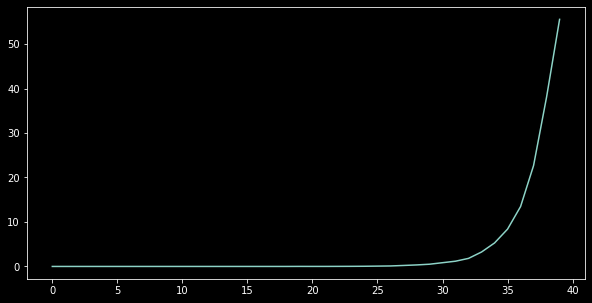

In [9]:
ns = list(range(1, 35))
plt.figure(figsize=(10,5))
plt.plot(n, times_slow);
# plt.plot(n, times_fast);

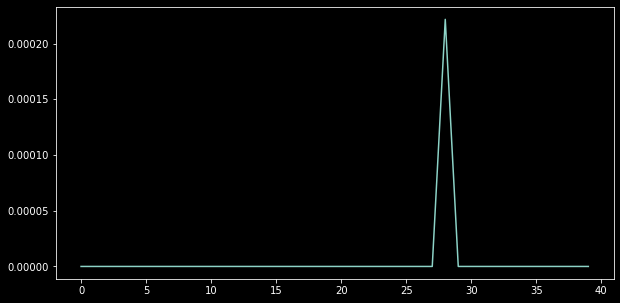

In [10]:
ns = list(range(1, 35))
plt.figure(figsize=(10,5))
# plt.plot(n, times_slow);
plt.plot(n, times_fast);

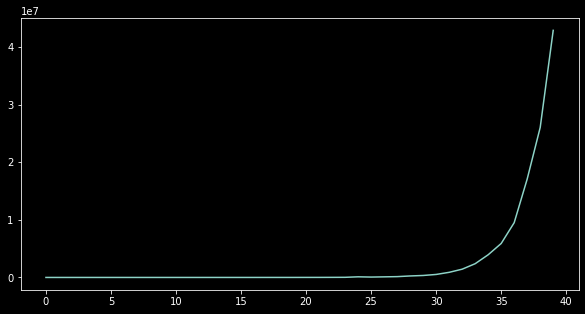

In [71]:
times_slow = np.array(times_slow)
times_fast = np.array(times_fast)
e = 1e-6

times_slow[times_slow<e] = e
times_fast[times_fast<e] = e
factor = times_slow/times_fast
plt.figure(figsize=(10,5))
plt.plot(n, factor);

Over $10^7$ times faster!

## Last Digit of Fibonacci Number

If we calculate $n^{th}$ Fibonacci number and then get the last digit of it, the problem become time consuming as well as memory consuming. So, instead of saving the $n^{th}$ Fibonacci number, we can save the last digit of the $n^{th}$ Fibonacci number. This works because the last digit of sum of any two Fibonacci numbers is the last digit of the first number plus the last digit of the second number.

In [47]:
# Uses python3
def fibo_last_digit(n):
    if n <= 1:
        return n

    zeros = [0] * (n - 1)
    nums = [0, 1]
    nums.extend(zeros)
    for i in range(2, n + 1):
        nums[i] = (nums[i - 1])%10 + (nums[i - 2])%10

    return int(str(nums[n])[-1])

In [12]:
fibo_last_digit(999999)

6

## Greatest Common Divisor

### Naiive Method

In [76]:
def gcd_slow(a, b):
    gcd = 0
    for i in range(1, a+b):
        if a%i == 0 and b%i == 0:
            gcd = i
    return gcd

In [77]:
gcd_slow(10, 5)

5

In [88]:
tic = time.time()
print(gcd_slow(123424012, 123424012*2))
toc = time.time()
print(toc-tic)

123424012
37.03440880775452


### Faster Method

#### Lemma

Let a and b be two numbers, and let gcd(a, b) be their greatest common divisor.

Then, gcd(a, b) = gcd(b, a mod b).

In [19]:
def gcd_fast(a, b):
    if b == 0:
        return a
    else:
        return gcd_fast(b, a%b)


In [92]:
gcd_fast(10, 5)

5

### Comparision

In [94]:
tic = time.time()
print(gcd_fast(123424012, 123424012*2))
toc = time.time()
print(toc-tic)

123424012
0.000997304916381836


In [97]:
def give_time(func, *args):
    tic = time.time()
    func(*args)
    toc = time.time()
    return toc-tic

In [103]:
large_nums1 = [856823, 9765213, 65213, 231746213, 981361623, 72351476, 567231523]
large_nums2 = [867532, 98432122, 987624, 3456231, 8765234231, 453216532, 754232]
nums = zip(large_nums1, large_nums2)

times_slow = []
times_fast = []

for i, j in nums:
    print(i, j)
    times_slow.append(give_time(gcd_slow, i, j))
    times_fast.append(give_time(gcd_fast, i, j))

856823 867532
9765213 98432122
65213 987624
231746213 3456231
981361623 8765234231
72351476 453216532
567231523 754232


In [111]:
times_slow = np.array(times_slow)
times_fast = np.array(times_fast)
e = 1e-6

times_slow[times_slow<e] = e
times_fast[times_fast<e] = e
factor = times_slow/times_fast

factor

array([  288820.50514221, 12716512.20321655,   120808.12454224,
       25783101.79710388,  1130924.19992889, 53063209.29527283,
       56607783.07914734])

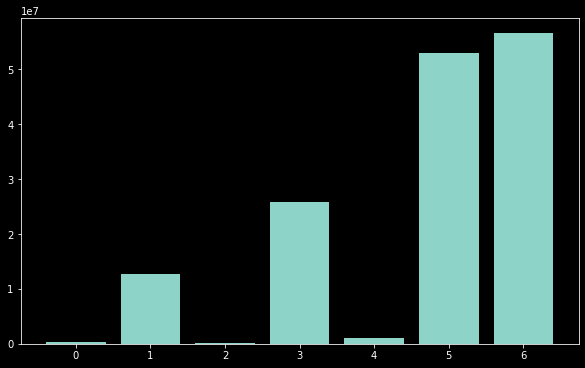

In [116]:
plt.figure(figsize = (10, 6))
plt.bar(range(len(factor)), factor);

Again, an improvement of order of $10^7$.

## Least Common Multiple

The least common multiple of two positive integers 𝑎 and 𝑏 is the least positive
integer 𝑚 that is divisible by both 𝑎 and 𝑏.

### Naive Approach

In [10]:
def lcm(a, b):
    lcm = a*b
    for i in range(1, a*b):
        if i%a ==0 and i%b == 0 and i<lcm:
            lcm = i
    return lcm

In [12]:
lcm(6, 8)

24

In [14]:
lcm(7617, 4573)

34832541

### Faster Approach

We know that the relarion between the least common multiple and the greatest common divisor is:
$$
lcm(a, b) = a \times b / gcd(a, b)
$$

We already have a faster method to calculate GCD, using that and the above formula, we can easily calculate LCM.

In [21]:
def lcm_fast(a, b):
    return int((a*b)/gcd_fast(a, b))

In [22]:
lcm_fast(7617, 4573)

34832541

In [23]:
lcm_fast(761457, 614573)

467970912861

## Fibonacci Number Again

For any integer $m \le 2$, the sequence $𝐹_𝑛 \quad mod \quad 𝑚$ is periodic. The period always starts with 01 and is known as Pisano period.

In [25]:
import pandas as pd
df = pd.read_csv("http://oeis.org/A001175/b001175.txt", header=None, sep='\s+')

In [30]:
pisano_nums = df[1][:1000].values
len(pisano_nums)

1000

In [36]:
def fibo_mod(n, m):
    cycle = pisano_nums[m-1]
    num = n%cycle
    return fibo_fast(num)%m

In [39]:
fibo_mod(2816213588, 239)

151

## Last Digit of the Sum of Fibonacci Numbers

### Naive Method

We already have a function which return the last digit of a number. We can use it.

In [3]:
# Uses python3
def fibo_last_digit(n):
    if n <= 1:
        return n

    nums = [0, 1]
    for i in range(2, n + 1):
        nums.append((nums[i - 1])%10 + (nums[i - 2])%10)

    return int(str(nums[n])[-1])
    
def sum_n_fibo(n):
    sum = 0
    for i in range(1, n+1):
        sum += fibo_last_digit(i)
    return sum%10

In [4]:
sum_n_fibo(100)

5

The sum of n Fibonacci numbers turns out to be:
$0\times F_{n+3}-1, 1\times F_{n+2}$

In [5]:
def sum_n_fibo_fast(n):
    return (fibo_last_digit(n+2)-1)%10

In [6]:
sum_n_fibo_fast(100)

5

In [7]:
sum_n_fibo_fast(832564823476)

In [63]:
nums = [3, 10, 20, 50, 100, 42, 673, 431, 76, 7865]
for num in nums:
    if sum_n_fibo(num) != sum_n_fibo_fast(num):
        print(num)
    else:
        print("OK")

OK
OK
OK
OK
OK
OK
OK
OK
OK
OK


In [64]:
fibo_last_digit(765)

0

In [65]:
sum_n_fibo(763), sum_n_fibo_fast(763)

(9, 9)

## Last Digit of the Sum of Fibonacci Numbers Again

We would like to find the last digit of a partial sum of Fibonacci numbers: $𝐹_𝑚 + 𝐹_{𝑚+1} + \cdots + 𝐹_𝑛$.

In [79]:
def fibo_last_digit_2(m, n):
    return fibo_last_digit(n)%10 - fibo_last_digit(m-1)%10

In [80]:
fibo_last_digit_2(10, 10)

1